# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [203]:
URL = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(URL, sep="\t")
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [204]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

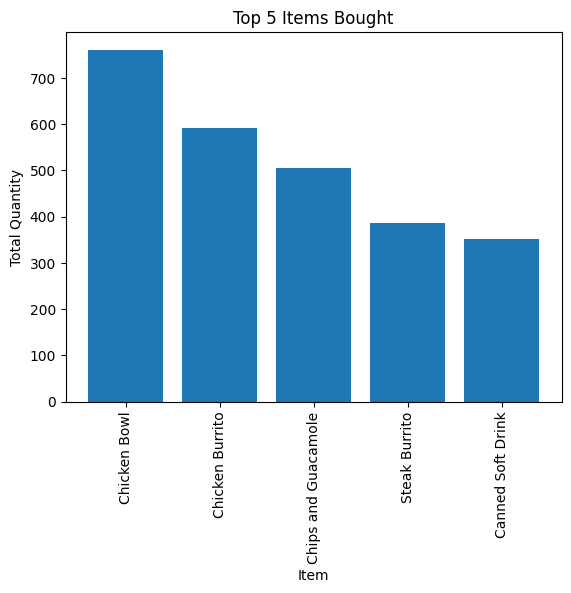

In [205]:
chipo["item_price"] = chipo["item_price"].apply(lambda x: float(x[1:]))

top5_bought = chipo.groupby("item_name")["quantity"].sum().nlargest(5)

plt.xticks(rotation="vertical")
plt.title("Top 5 Items Bought")
plt.xlabel("Item")
plt.ylabel("Total Quantity")
plt.bar(top5_bought.index, top5_bought)
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

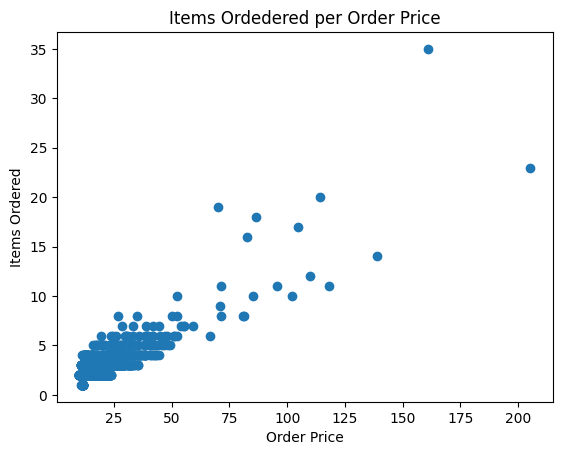

In [206]:
chipo_by_order = chipo.groupby("order_id").sum()
plt.scatter(chipo_by_order["item_price"], chipo_by_order["quantity"])
plt.title("Items Ordedered per Order Price")
plt.xlabel("Order Price")
plt.ylabel("Items Ordered")
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

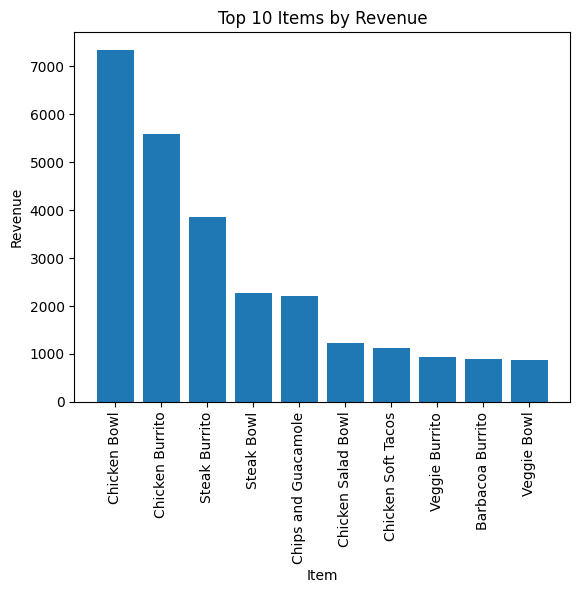

In [207]:
# Quais são os 10 itens que mais geraram receita?

top10_revenue = chipo.groupby("item_name")["item_price"].sum().nlargest(10)

plt.xticks(rotation="vertical")
plt.title("Top 10 Items by Revenue")
plt.xlabel("Item")
plt.ylabel("Revenue")
plt.bar(top10_revenue.index, top10_revenue.values)
plt.show()